

#   **Import packges**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/py/bi/Retail Sales Dataset.csv')

In [3]:
df.head()

,Order ID,Date,Customer ID,Gender,Age,Product Category,Payment Method,City,Store Type,Quantity,Price per Unit,Total Amount,Total Price,Delivery Status,High Value Order,Sales Rep E-mail
0,559,01/01/2023,CUST559,Female,40,Clothing,Credit Card,Miami,Department Store,4,300,1200,1200,Pending,Yes,miamirep@gmail.com
1,180,01/01/2023,CUST180,Male,41,Clothing,Debit Card,San Francisco,Pharmacy,3,300,900,900,Pending,Yes,sanfranciscorep@gmail.com
2,522,01/01/2023,CUST522,Male,46,Beauty,Debit Card,San Francisco,Specialty Store,3,500,1500,1500,Completed,Yes,sanfranciscorep@gmail.com
3,979,02/01/2023,CUST979,Female,19,Beauty,Mobile Payment,Boston,Convenience Store,1,25,25,25,Completed,No,bostonrep@gmail.com
4,163,02/01/2023,CUST163,Female,64,Clothing,Mobile Payment,Chicago,Pharmacy,3,50,150,150,Pending,No,chicagorep@gmail.com


#**EDA**

**all type correct**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           1000 non-null   int64 
 1   Date               1000 non-null   object
 2   Customer ID        1000 non-null   object
 3   Gender             1000 non-null   object
 4   Age                1000 non-null   int64 
 5   Product Category   1000 non-null   object
 6   Payment Method     1000 non-null   object
 7   City               1000 non-null   object
 8   Store Type         1000 non-null   object
 9   Quantity           1000 non-null   int64 
 10  Price per Unit     1000 non-null   int64 
 11  Total Amount       1000 non-null   int64 
 12  Total Price        1000 non-null   int64 
 13  Delivery Status    1000 non-null   object
 14  High Value Order   1000 non-null   object
 15  Sales Rep E-mail   1000 non-null   object
dtypes: int64(6), object(10)
memory usage: 125.1

In [5]:
df.describe()

,Order ID,Age,Quantity,Price per Unit,Total Amount,Total Price
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.632000,179.890000,476.160000,476.160000
std,288.819436,13.68143,1.465853,189.681356,620.188349,620.188349
min,1.000000,18.00000,1.000000,25.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,150.000000,150.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,900.000000
max,1000.000000,64.00000,10.000000,500.000000,5000.000000,5000.000000


**no duplicated**

In [6]:
df.duplicated().sum()

np.int64(0)

**no** **nulls**

In [7]:
df.isnull().sum()

,0
Order ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Payment Method,0
City,0
Store Type,0
Quantity,0


# DATA VISZ

**Sales by Gender**

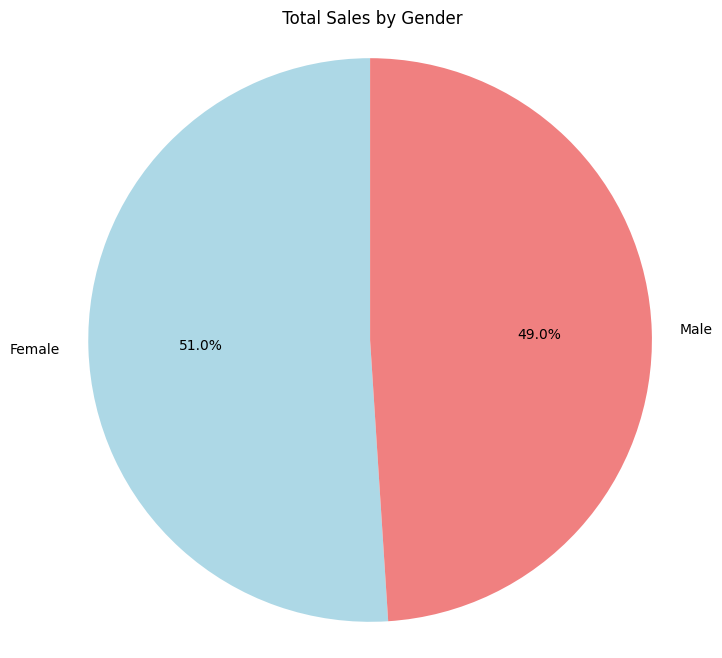

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/py/bi/Retail Sales Dataset.csv')

gender_price = df.groupby('Gender')['Total Price'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(gender_price['Total Price'], labels=gender_price['Gender'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title(' Total Sales by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

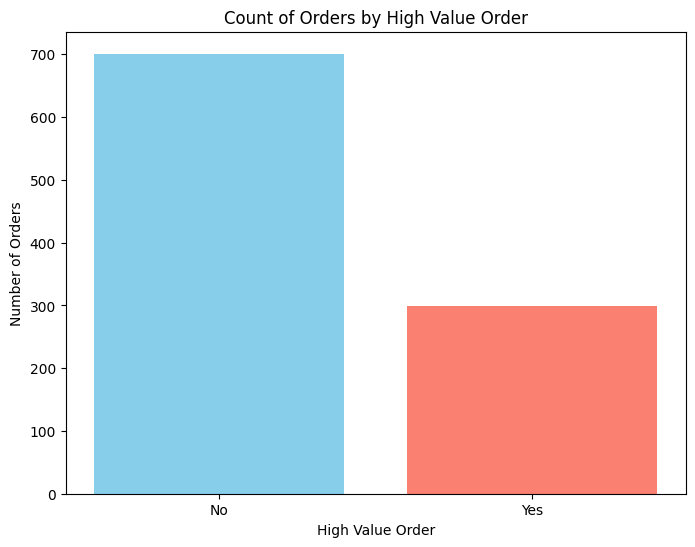

In [9]:
high_value_order_counts = df.groupby('High Value Order')['Order ID'].count().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(high_value_order_counts['High Value Order'], high_value_order_counts['Order ID'], color=['skyblue', 'salmon'])
plt.title('Count of Orders by High Value Order')
plt.xlabel('High Value Order')
plt.ylabel('Number of Orders')
plt.show()

**Top 5 city sales**

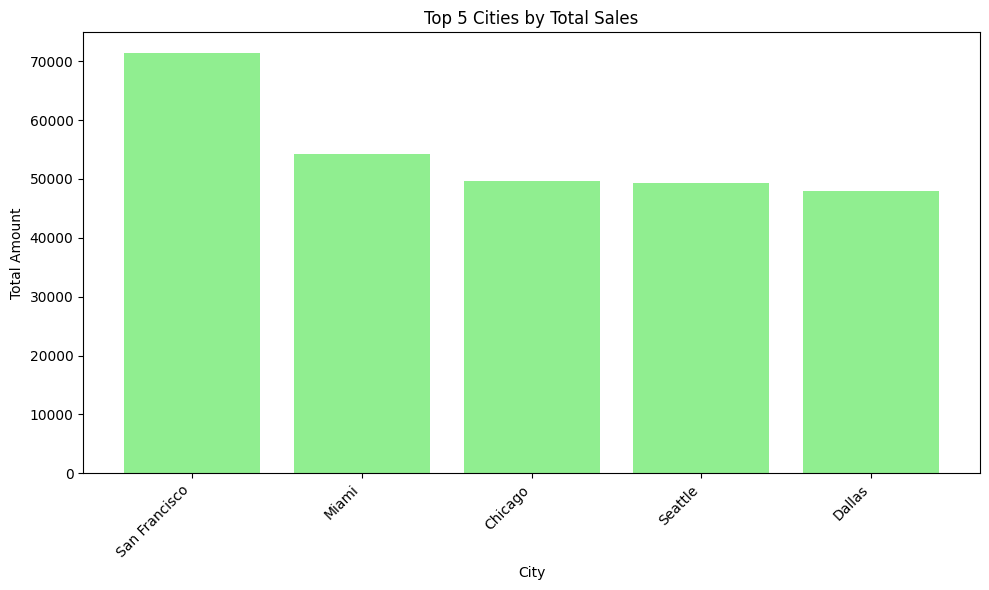

In [10]:
city_total_amount = df.groupby('City')['Total Amount'].sum().reset_index()

top_5_cities = city_total_amount.nlargest(5, 'Total Amount')

plt.figure(figsize=(10, 6))
plt.bar(top_5_cities['City'], top_5_cities['Total Amount'], color='lightgreen')
plt.title('Top 5 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Sales & quantity over time**

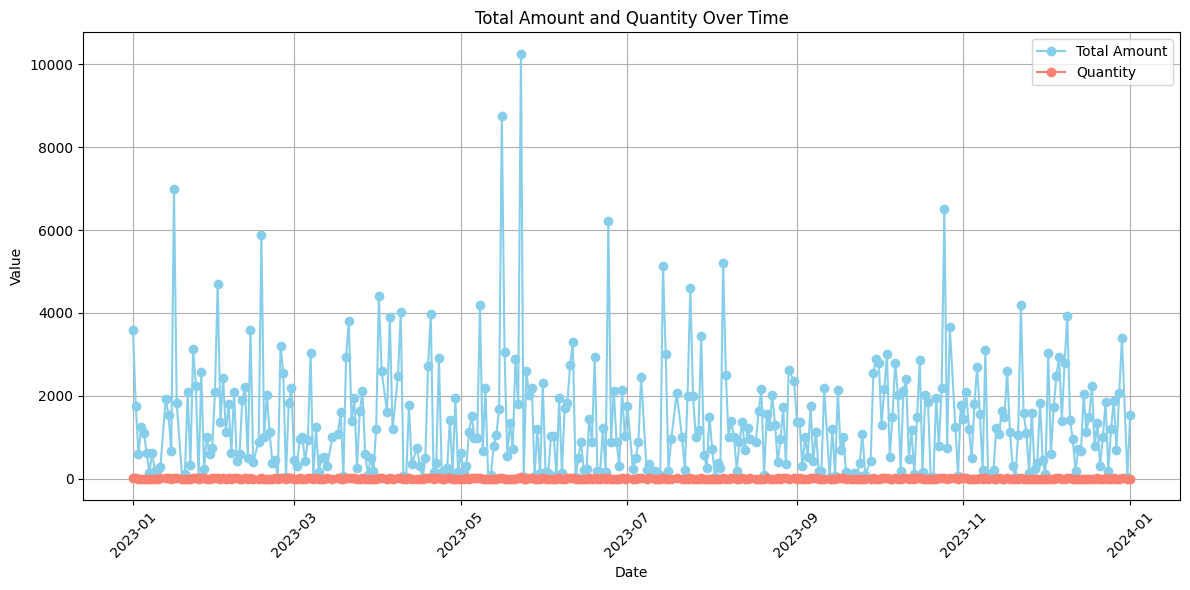

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

daily_sales = df.groupby('Date')[['Total Amount', 'Quantity']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], marker='o', linestyle='-', color='skyblue', label='Total Amount')
plt.plot(daily_sales['Date'], daily_sales['Quantity'], marker='o', linestyle='-', color='salmon', label='Quantity')

plt.title('Total Amount and Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

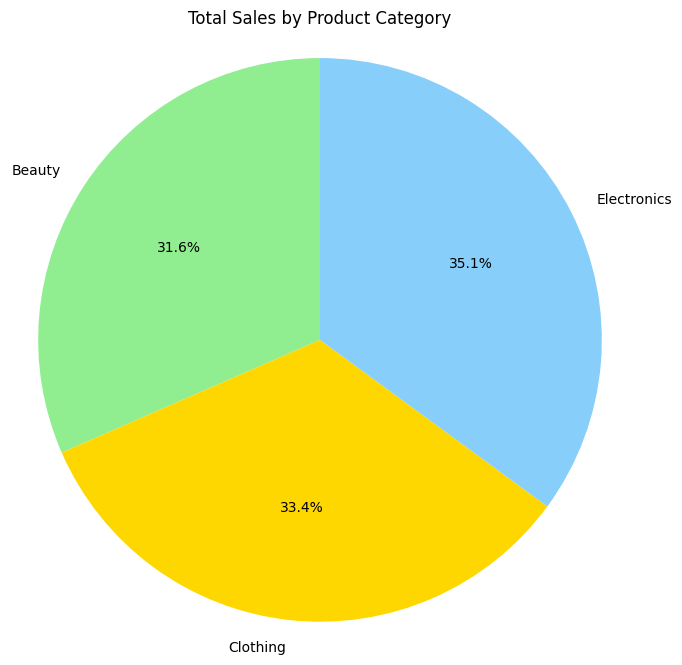

In [12]:
# Total Sales by Product Category
category_total_price = df.groupby('Product Category')['Total Price'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(category_total_price['Total Price'], labels=category_total_price['Product Category'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'gold', 'lightskyblue'])
plt.title('Total Sales by Product Category')
plt.axis('equal')
plt.show()

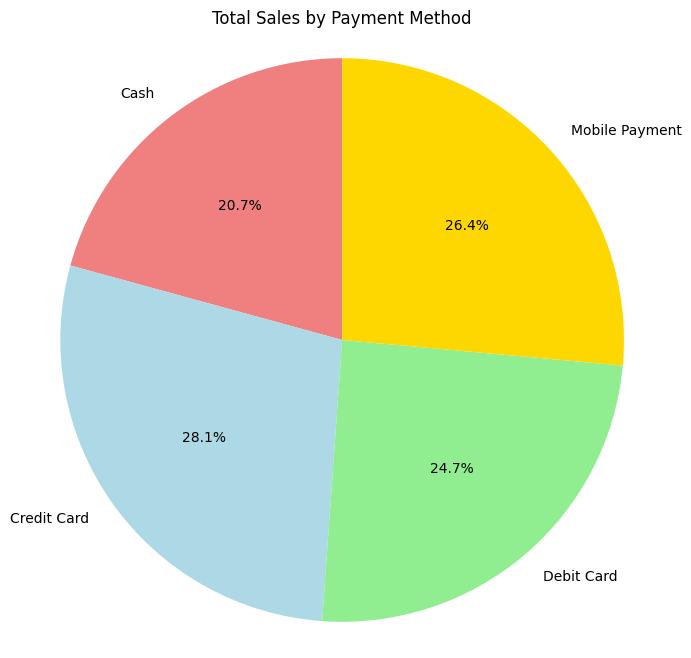

In [13]:
# Total Sales by Payment Method
payment_method_total_price = df.groupby('Payment Method')['Total Price'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(payment_method_total_price['Total Price'], labels=payment_method_total_price['Payment Method'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
plt.title('Total Sales by Payment Method')
plt.axis('equal')
plt.show()

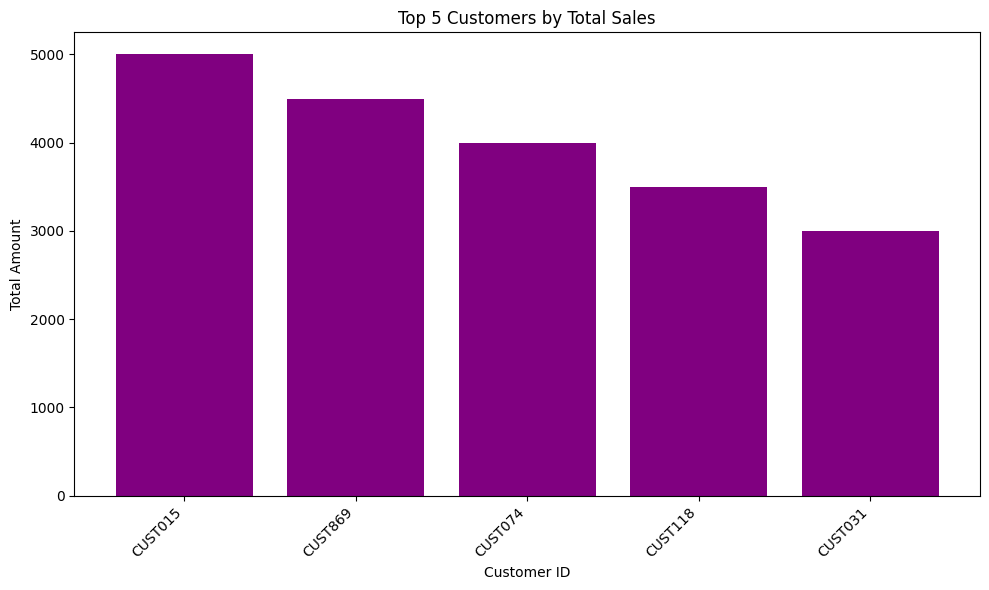

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_customers['Customer ID'], top_5_customers['Total Amount'], color='purple')
plt.title('Top 5 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

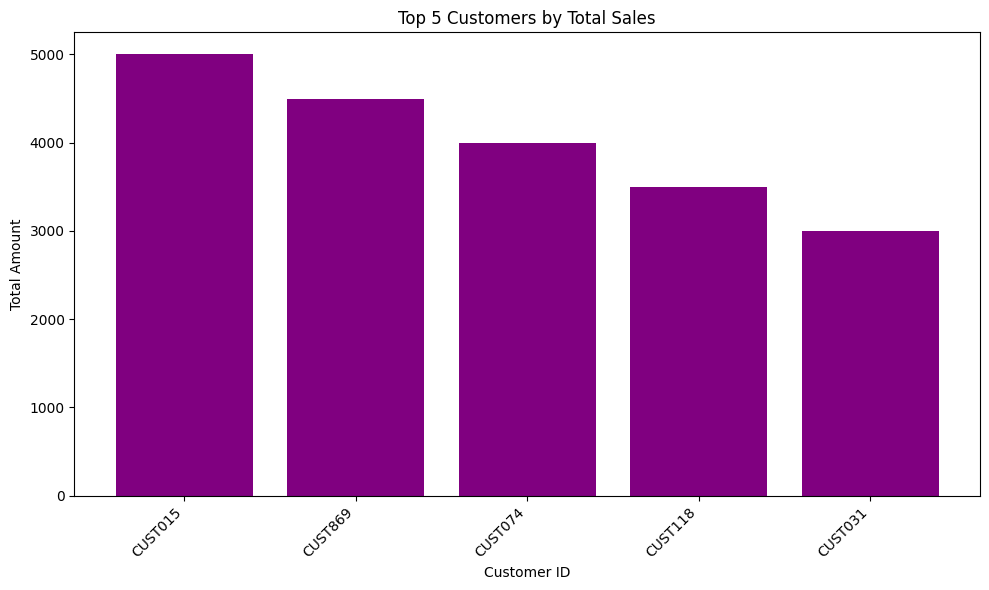

In [16]:
customer_sales = df.groupby('Customer ID')['Total Amount'].sum().reset_index()

top_5_customers = customer_sales.nlargest(5, 'Total Amount')

plt.figure(figsize=(10, 6))
plt.bar(top_5_customers['Customer ID'], top_5_customers['Total Amount'], color='purple')
plt.title('Top 5 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot Total Sales by Gender on the first subplot
axes[0].pie(gender_price['Total Price'], labels=gender_price['Gender'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[0].set_title('Total Sales by Gender')
axes[0].axis('equal')

# Plot Total Sales by Product Category on the second subplot
axes[1].pie(category_total_price['Total Price'], labels=category_total_price['Product Category'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'gold', 'lightskyblue'])
axes[1].set_title('Total Sales by Product Category')
axes[1].axis('equal')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()